# Using `frequentist_statistics` functions from the `jmspack` package

## Showing the usage of the following `frequentist_statistics` functions

- normal_check()
- correlation_analysis()
- correlations_as_sample_increases()
- multiple_univariate_OLSs()
- potential_for_change_index()

In [1]:
import os
tmp = os.getcwd()
os.chdir(tmp.split("jmspack")[0] + "jmspack")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jmspack.frequentist_statistics import (normal_check, 
#                                             permute_test, 
                                            correlation_analysis,
                                            correlations_as_sample_increases,
                                            multiple_univariate_OLSs,
                                            potential_for_change_index
                                           )
from jmspack.utils import apply_scaling
import pingouin as pg
import statsmodels.api as sm

In [3]:
os.chdir(tmp)

In [4]:
if "jms_style_sheet" in plt.style.available:
    _ = plt.style.use("jms_style_sheet")

In [5]:
df = sns.load_dataset("iris")#.head(10)

## normal_check()

#### compare the distribution of numeric variables to a normal distribution using the Kolmogrov-Smirnov test

In [6]:
normal_check(df)

,feature,p-value,normality
0,sepal_length,0.170584,True
1,sepal_width,0.064491,True
2,petal_length,0.000011,False
3,petal_width,0.000200,False


## correlation_analysis()

#### Run correlations for numerical features and return output in different formats

In [7]:
feature1 = "sepal_length"
feature2 = "petal_length"

In [8]:
X = df[feature1]
y = df[feature2]

In [9]:
output = correlation_analysis(data=df,
                             check_norm=True,
                              dropna = 'pairwise',
                                permutation_test = False,
                                n_permutations = 10,
                                random_state=69420)

In [10]:
output["summary"].round(4)

,analysis,feature1,feature2,r-value,p-value,stat-sign,N
0,Pearson,sepal_length,sepal_width,-0.1176,0.1519,False,150
1,Spearman Rank,sepal_length,petal_length,0.8819,0.0000,True,150
2,Spearman Rank,sepal_length,petal_width,0.8343,0.0000,True,150
3,Spearman Rank,sepal_width,petal_length,-0.3096,0.0001,True,150
4,Spearman Rank,sepal_width,petal_width,-0.2890,0.0003,True,150
5,Spearman Rank,petal_length,petal_width,0.9377,0.0000,True,150


## correlations_as_sample_increases()

#### Run correlations for subparts of the data to check robustness

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


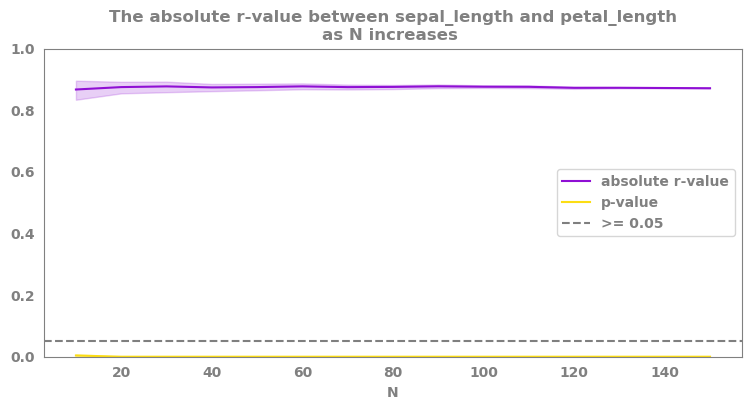

In [11]:
summary, fig = correlations_as_sample_increases(data=df.select_dtypes("number"),
                                 feature1=feature1,
                                feature2=feature2,
                                starting_N = 10,
                                step = 10,
                                method='pearson',
                                random_state=42,
                                bootstrap = True,
                                bootstrap_per_N = 20,
                                plot = True,
                                addition_to_title = '',
                                alpha = 0.05)

## multiple_univariate_OLSs()

#### Tmp

In [12]:
features_list = df.select_dtypes(float).columns.tolist()

In [13]:
target = "species_cat_codes"

In [14]:
df=df.assign(**{target: lambda x: x["species"].astype("category").cat.codes})

In [15]:
X = df[features_list]
y = df[target]

In [16]:
OLS_df = multiple_univariate_OLSs(X=X, y=y, features_list=features_list)
OLS_df

,coef,std err,t,P>|t|,[0.025,0.975],rsquared,rsquared_adj
sepal_length,0.7742,0.051,15.292,0.0,0.674,0.874,0.612402,0.609783
sepal_width,-0.8019,0.140,-5.739,0.0,-1.078,-0.526,0.182037,0.176510
petal_length,0.4404,0.012,36.632,0.0,0.417,0.464,0.900667,0.899996
petal_width,1.0281,0.026,39.910,0.0,0.977,1.079,0.914983,0.914408


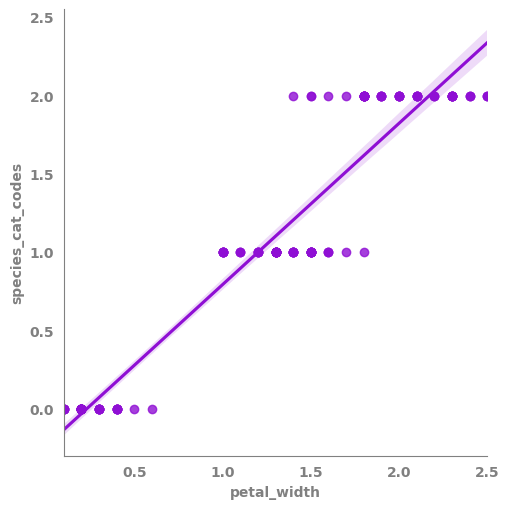

In [17]:
_ = sns.lmplot(data=df,
               x=features_list[3],
              y=target)

## potential_for_change_index()

#### Calculate the potential for change index based on either variants of the r-squared (from linear regression) or the r-value (pearson correlation)

In [18]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_cat_codes
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


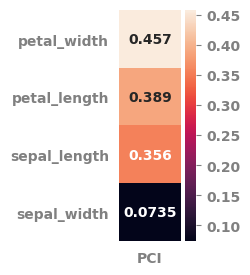

In [19]:
pot_df = potential_for_change_index(data=df.select_dtypes("number"),
                                    features_list=features_list,
                                    target=target, 
                                    minimum_measure = "min",
                                    centrality_measure = "median",
                                    maximum_measure = "max",
                                    weight_measure = "rsquared_adj",
                                    scale_data = True,
                                    pci_heatmap = True,
                                    pci_heatmap_figsize = (1, 3)
                                   )

In [20]:
pot_df.round(3)

,PCI,min,median,max,rsquared_adj,P>|t|
sepal_length,0.356,0.0,0.417,1.0,0.610,0.0
petal_length,0.389,0.0,0.568,1.0,0.900,0.0
petal_width,0.457,0.0,0.500,1.0,0.914,0.0
sepal_width,0.074,0.0,0.417,1.0,0.177,0.0


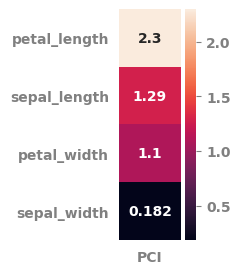

In [21]:
pot_df = potential_for_change_index(data=df.select_dtypes("number"),
                                    features_list=features_list,
                                    target=target, 
                                    minimum_measure = "min",
                                    centrality_measure = "median",
                                    maximum_measure = "max",
                                    weight_measure = "rsquared",
                                    scale_data = False,
                                    pci_heatmap = True,
                                    pci_heatmap_figsize = (1, 3)
                                   )

In [22]:
pot_df.round(3)

,PCI,min,median,max,rsquared,P>|t|
sepal_length,1.286,4.3,5.80,7.9,0.612,0.0
petal_length,2.297,1.0,4.35,6.9,0.901,0.0
petal_width,1.098,0.1,1.30,2.5,0.915,0.0
sepal_width,0.182,2.0,3.00,4.4,0.182,0.0


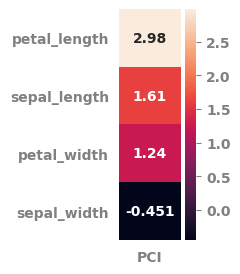

In [23]:
pot_df = potential_for_change_index(data=df.select_dtypes("number"),
                                    features_list=features_list,
                                    target=target, 
                                    minimum_measure = "min",
                                    centrality_measure = "mean",
                                    maximum_measure = "max",
                                    weight_measure = "r-value",
                                    scale_data = False,
                                    pci_heatmap = True,
                                    pci_heatmap_figsize = (1, 3)
                                   )

In [24]:
pot_df.sort_values(by="PCI", ascending=False).round(3)

,PCI,min,mean,max,r-value,p-value
petal_length,2.982,1.0,3.758,6.9,0.949,0.0
sepal_length,1.609,4.3,5.843,7.9,0.783,0.0
petal_width,1.244,0.1,1.199,2.5,0.957,0.0
sepal_width,-0.451,2.0,3.057,4.4,-0.427,0.0
